In [2]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import sys
sys.path.append('../src')
from models import open_pickle, filter_terms_not_in_wemodel

In [3]:
we_model_name = "sg_dim300_min100_win5"
we_vector_size = 300
we_model_dir = '../data/external/wiki-english/wiki-english-20171001/%s' % we_model_name

we_model = Word2Vec.load(we_model_dir+'/model.gensim')
print ('loading done!')

loading done!


In [55]:
FILEPATH = '../data/interim/association_metric_exps.pickle'
results_dict = open_pickle(FILEPATH)
EXPERIMENT_DEFINITION_FILEPATH = '../data/interim/experiment_definitions.pickle'
exp_def_dict = open_pickle(EXPERIMENT_DEFINITION_FILEPATH)

## See Entire Results Dict

In [19]:
# WEAT 1
exp_num = 1
X_terms = ['aster', 'clover', 'hyacinth', 'marigold', 'poppy', 'azalea', 
           'crocus', 'iris', 'orchid', 'rose', 'bluebell', 'daffodil','lilac',
           'pansy','tulip','buttercup','daisy','lily','penny','violet','carnation', 'gladiola',
           'magnolia','petunia','zinnia']
Y_terms = ['ant','caterpillar','flea','locust','spider','bedbug','centipede','fly',
          'maggot','tarantula','bee','cockroach','gnat','mosquito','termite','beetle',
          'cricket','hornet','moth','wasp','blackfly','dragonfly','horsefly','roach',
          'weevil']
A_terms = ['caress','freedom','health','love','peace','cheer','friend','heaven',
           'loyal','pleasure','diamond','gentle','honest','lucky','rainbow','diploma',
           'gift','honor','miracle','sunrise','family','happy','laugher','paradise',
           'vacation']
B_terms = ['abuse','crash','filth','murder','sickness','accident','death','grief',
          'poison','stink','assault','disaster','hatred','pollute','tragedy',
          'divorce','jail','poverty','ugly','cancer','kill','rotten','vomit','agony',
          'prison']
X_terms, Y_terms = filter_terms_not_in_wemodel(we_model, X_terms, Y_terms)
A_terms, B_terms = filter_terms_not_in_wemodel(we_model, A_terms, B_terms)

The following terms were removed from the list first_list because they were not found in the we_model: ['gladiola']
The following terms were removed from the list second_list because they were not found in the we_model: []
The following terms were removed from the second list to balance the length of the lists: ['ant']
The following terms were removed from the list first_list because they were not found in the we_model: []
The following terms were removed from the list second_list because they were not found in the we_model: []


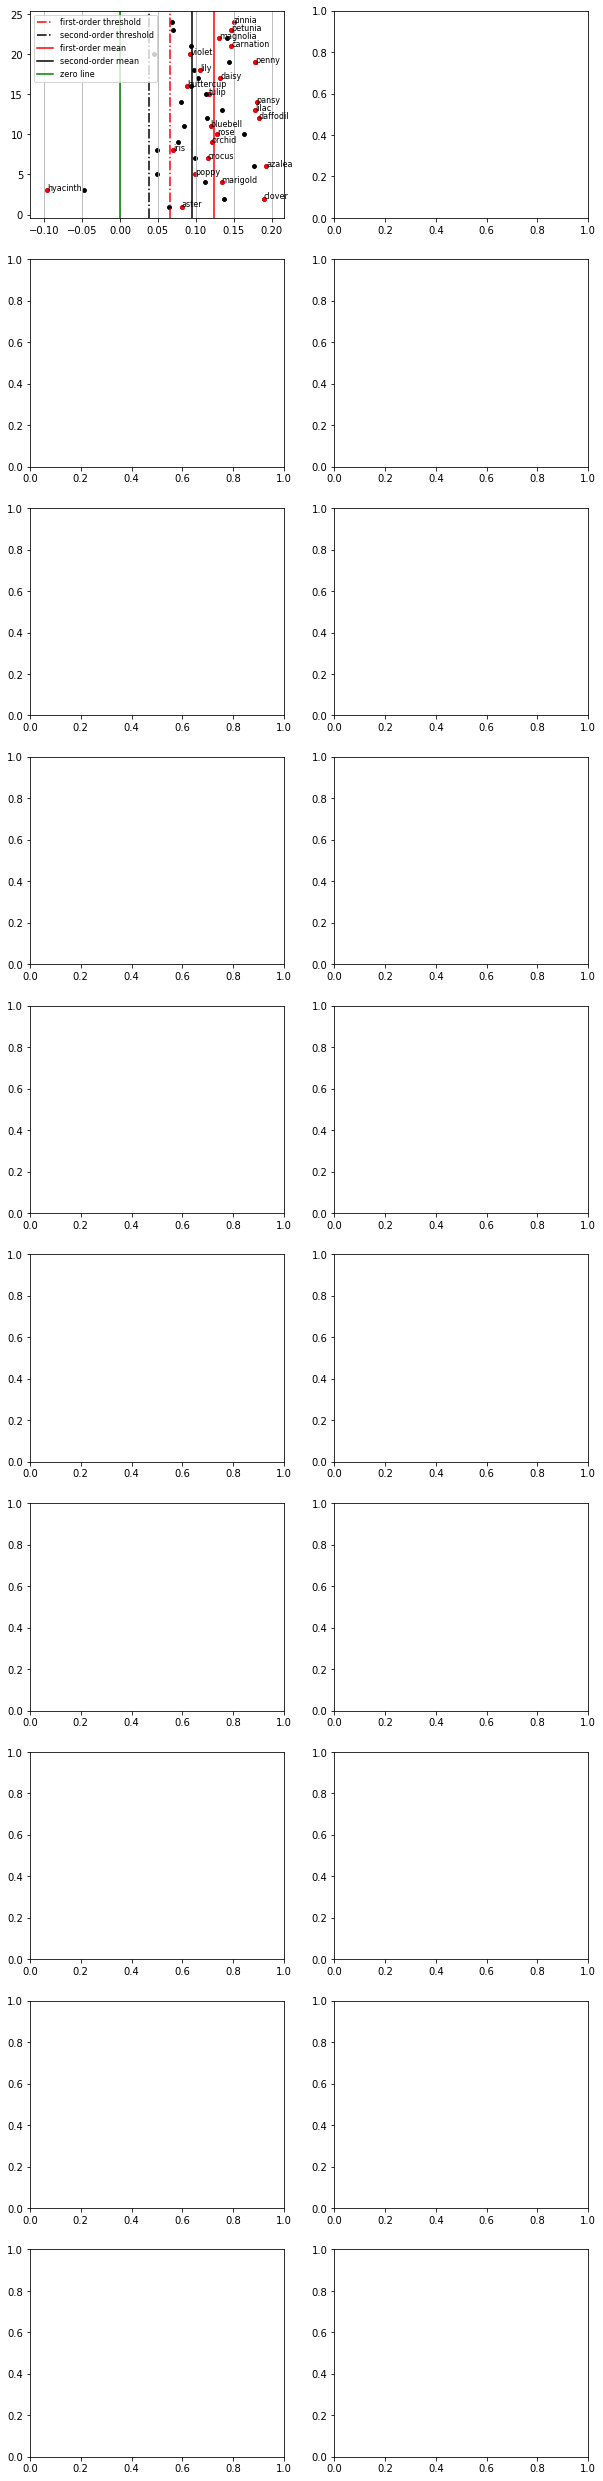

In [52]:
fig, axs = plt.subplots(10,2, figsize=(10,45))
S = 15 # Marker size
ax = axs[0,0]
axs[0,0].scatter(arr_first, y, s=S)
arr_first = results_dict[1]['first']['X_array']
arr_second = results_dict[1]['second']['X_array']
threshold_first = results_dict[1]['first']['threshold']
threshold_second = results_dict[1]['second']['threshold']
mean_first = results_dict[1]['first']['X_mean']
mean_second = results_dict[1]['second']['X_mean']

y = [i for i in range(1,len(arr_first)+1)]
ax.scatter(arr_first, y, c='red', s=S)
ax.scatter(arr_second, y, c='black', s=S)
ax.xaxis.grid()
ax.axvline(threshold_first, c='red', linestyle='-.',label='first-order threshold')
ax.axvline(threshold_second, color='black', linestyle='-.', label='second-order threshold')
ax.axvline(mean_first, c='red', label='first-order mean')
ax.axvline(mean_second, c='black', label='second-order mean')
ax.axvline(0, c='green', label='zero line')
for i, txt in enumerate(X_terms):
    ax.annotate(txt, (arr_first[i], y[i]), fontsize=8)
ax.legend(loc=2, prop={'size': 8})
ax.set_title()
#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels)
plt.show()

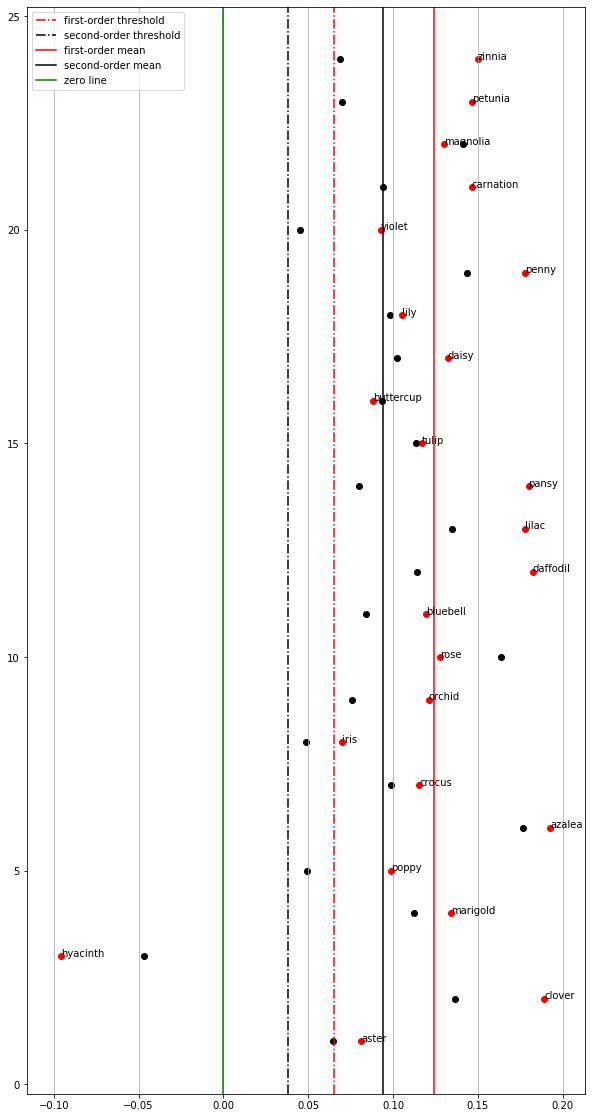

In [20]:
arr_first = results_dict[1]['first']['X_array']
arr_second = results_dict[1]['second']['X_array']
threshold_first = results_dict[1]['first']['threshold']
threshold_second = results_dict[1]['second']['threshold']
mean_first = results_dict[1]['first']['X_mean']
mean_second = results_dict[1]['second']['X_mean']

y = [i for i in range(1,len(arr_first)+1)]
plt.figure(figsize=(10,20))
plt.scatter(arr_first, y, c='red')
plt.scatter(arr_second, y, c='black')
plt.gca().xaxis.grid()
plt.gca().axvline(threshold_first, c='red', linestyle='-.',label='first-order threshold')
plt.gca().axvline(threshold_second, color='black', linestyle='-.', label='second-order threshold')
plt.gca().axvline(mean_first, c='red', label='first-order mean')
plt.gca().axvline(mean_second, c='black', label='second-order mean')
plt.gca().axvline(0, c='green', label='zero line')
for i, txt in enumerate(X_terms):
    plt.gca().annotate(txt, (arr_first[i], y[i]))
plt.legend()
plt.show()

In [54]:
exp_def_dict[1]

{'X_terms': ['aster',
  'clover',
  'hyacinth',
  'marigold',
  'poppy',
  'azalea',
  'crocus',
  'iris',
  'orchid',
  'rose',
  'bluebell',
  'daffodil',
  'lilac',
  'pansy',
  'tulip',
  'buttercup',
  'daisy',
  'lily',
  'penny',
  'violet',
  'carnation',
  'magnolia',
  'petunia',
  'zinnia'],
 'Y_terms': ['caterpillar',
  'flea',
  'locust',
  'spider',
  'bedbug',
  'centipede',
  'fly',
  'maggot',
  'tarantula',
  'bee',
  'cockroach',
  'gnat',
  'mosquito',
  'termite',
  'beetle',
  'cricket',
  'hornet',
  'moth',
  'wasp',
  'blackfly',
  'dragonfly',
  'horsefly',
  'roach',
  'weevil'],
 'A_terms': ['caress',
  'freedom',
  'health',
  'love',
  'peace',
  'cheer',
  'friend',
  'heaven',
  'loyal',
  'pleasure',
  'diamond',
  'gentle',
  'honest',
  'lucky',
  'rainbow',
  'diploma',
  'gift',
  'honor',
  'miracle',
  'sunrise',
  'family',
  'happy',
  'laugher',
  'paradise',
  'vacation'],
 'B_terms': ['abuse',
  'crash',
  'filth',
  'murder',
  'sickness',
 

In [3]:
results_dict = open_pickle(FILEPATH)
results_dict

{1: defaultdict(dict,
             {'first': {'X_array': array([ 0.08113076,  0.18911934, -0.0954811 ,  0.13401467,  0.09897012,
                       0.19287561,  0.11558053,  0.06996465,  0.12096066,  0.12797187,
                       0.11942707,  0.18256408,  0.17806363,  0.17999095,  0.11687332,
                       0.08817419,  0.13236946,  0.10520089,  0.17782208,  0.09271343,
                       0.14632878,  0.13019669,  0.14671066,  0.15014505], dtype=float32),
               'Y_array': array([-0.04801004, -0.06460989, -0.08932857, -0.06297787, -0.40200305,
                      -0.1162259 ,  0.05139589, -0.29557508, -0.14763156,  0.11352445,
                      -0.1613886 , -0.0787251 , -0.19676779, -0.14766207, -0.03967397,
                       0.07359396, -0.04168847,  0.08253389, -0.0736915 , -0.06181172,
                       0.0839064 ,  0.08104831,  0.03454182, -0.13286161], dtype=float32),
               'X_mean': 0.12423697,
               'Y_mean': -0.0683

## Retrieve a Specific Experiment

In [5]:
EXP_NUM = 3
EXP_NAME = 'second_order_X'
arr_for_plotting = results_dict[EXP_NUM][EXP_NAME]
arr_for_plotting

array([0.23449796, 0.2345688 , 0.0989702 , 0.37882134, 0.02910594,
       0.27740997, 0.16379115, 0.19063637, 0.41707927, 0.29391664,
       0.1971741 , 0.21215774, 0.3162869 , 0.2859519 , 0.3024328 ,
       0.18131642, 0.4094162 , 0.2760841 , 0.23804706, 0.30866247,
       0.30504382, 0.30536607, 0.20394868, 0.3266883 , 0.28670394,
       0.314532  , 0.30773422, 0.38299367, 0.3626843 , 0.20989752,
       0.20443484, 0.2916711 , 0.32588214], dtype=float32)

In [6]:
# These are the X_terms from experiment 3 that correspond to the bias values above
X_terms = ['roger','alan','frank','ian','justin',
          'ryan','andrew','fred','jack','matthew','stephen','brad','greg','jed',
          'paul','todd','brandon','hank','jonathan','peter','wilbur','amanda',
          'courtney','heather','melanie','sara','amber','crystal','katie',
          'meredith','shannon','betsy','donna','kristin','nancy','stephanie',
          'bobbie-sue','ellen','lauren','peggy','sue-ellen','colleen','emily',
          'megan','rachel','wendy']